In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [2]:
df = pd.DataFrame({
    'contract no':np.random.randint(111111,999999,(10000)),
    'stock_symbol':np.random.choice([''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'),5)) for i in range(20)],10000),
    'buyer_broker':np.random.randint(1,20,10000),
    'seller_broker':np.random.randint(1,20,10000),
    'quantity':np.random.randint(50,1000,10000),
    'rate':np.random.randint(100,10000,10000),
    'date':[f"20{k}-{i}-{j}" for k in range(10,50) for i in range(1,11) for j in range(1,29)][:10000]
}).reset_index().rename(columns={'index':'sn'})

In [3]:
df

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date
0,0,179632,FRXCJ,17,9,739,1177,2010-1-1
1,1,852266,ILROB,11,19,921,2693,2010-1-2
2,2,576483,BQMCC,8,11,78,1523,2010-1-3
3,3,964959,EPTEL,3,19,290,9874,2010-1-4
4,4,506457,JEHGO,15,3,718,8472,2010-1-5
...,...,...,...,...,...,...,...,...
9995,9995,595878,BLVYO,8,8,863,4338,2045-7-28
9996,9996,714837,MMZZT,1,1,221,3941,2045-8-1
9997,9997,397294,YIVQZ,6,18,831,1486,2045-8-2
9998,9998,993093,YIVQZ,6,7,988,1681,2045-8-3


In [4]:
df["amount"] = df["quantity"]* df["rate"]
df['date']=pd.to_datetime(df['date'])

In [5]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,179632,FRXCJ,17,9,739,1177,2010-01-01,869803
1,1,852266,ILROB,11,19,921,2693,2010-01-02,2480253
2,2,576483,BQMCC,8,11,78,1523,2010-01-03,118794
3,3,964959,EPTEL,3,19,290,9874,2010-01-04,2863460
4,4,506457,JEHGO,15,3,718,8472,2010-01-05,6082896


In [6]:
df.tail()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
9995,9995,595878,BLVYO,8,8,863,4338,2045-07-28,3743694
9996,9996,714837,MMZZT,1,1,221,3941,2045-08-01,870961
9997,9997,397294,YIVQZ,6,18,831,1486,2045-08-02,1234866
9998,9998,993093,YIVQZ,6,7,988,1681,2045-08-03,1660828
9999,9999,566060,TFYGY,14,17,112,6163,2045-08-04,690256


# Single Broker Details

In [7]:
df[df['buyer_broker']==1].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
27,27,545285,BQMCC,1,4,272,5036,2010-01-28,1369792
30,30,752422,XYZFO,1,3,467,1674,2010-02-03,781758
42,42,538888,ZUBAV,1,3,710,3433,2010-02-15,2437430
113,113,577941,JEBVT,1,11,576,2388,2010-05-02,1375488
135,135,533926,MBATE,1,7,305,7434,2010-05-24,2267370
156,156,676246,JEBVT,1,16,292,1369,2010-06-17,399748
158,158,224877,ZUBAV,1,4,700,5318,2010-06-19,3722600
272,272,598365,KGULS,1,4,280,974,2010-10-21,272720
310,310,963679,YIVQZ,1,5,486,6863,2011-02-03,3335418
358,358,465513,BSPSO,1,15,273,2893,2011-03-23,789789


In [8]:
df[df['buyer_broker']==2].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
6,6,202684,JEHGO,2,4,471,5212,2010-01-07,2454852
7,7,349319,XYZFO,2,2,595,7360,2010-01-08,4379200
20,20,139784,BSPSO,2,8,233,9050,2010-01-21,2108650
41,41,872196,ZUBAV,2,3,583,2882,2010-02-14,1680206
58,58,802352,MBATE,2,16,306,8865,2010-03-03,2712690
67,67,699397,TFYGY,2,4,251,8086,2010-03-12,2029586
70,70,305306,WKHZE,2,7,70,1135,2010-03-15,79450
89,89,770942,KGULS,2,9,61,6204,2010-04-06,378444
96,96,688644,FRXCJ,2,14,609,4745,2010-04-13,2889705
127,127,555509,KGULS,2,3,463,5458,2010-05-16,2527054


# data between date ranges

In [9]:
year_range = df[(df['date']>'2010-01-04')&(df['date']<'2011-01-04')]
year_range.head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
4,4,506457,JEHGO,15,3,718,8472,2010-01-05,6082896
5,5,349989,ZUBAV,11,15,663,3973,2010-01-06,2634099
6,6,202684,JEHGO,2,4,471,5212,2010-01-07,2454852
7,7,349319,XYZFO,2,2,595,7360,2010-01-08,4379200
8,8,649233,ZUBAV,4,3,980,8512,2010-01-09,8341760
9,9,641823,TFYGY,9,6,351,6943,2010-01-10,2436993
10,10,816473,MMZZT,15,15,295,6288,2010-01-11,1854960
11,11,122373,MBATE,19,11,589,269,2010-01-12,158441
12,12,696984,FRXCJ,11,19,994,7324,2010-01-13,7280056
13,13,893776,MBATE,10,18,174,7014,2010-01-14,1220436


In [10]:
year_range.groupby(["buyer_broker"])["quantity"].sum().sort_values(ascending= False)

buyer_broker
5     12806
18    12170
14    10086
10     9997
13     9713
6      8801
4      8482
9      8154
2      8045
8      7231
15     6622
17     6521
19     6386
7      6377
12     5744
11     5652
3      5424
1      3602
16     3571
Name: quantity, dtype: int32

### Broker 17 was max stock buyer

In [11]:
year_range.groupby(["seller_broker"])["quantity"].sum().sort_values(ascending= False)

seller_broker
3     11612
11    10934
6     10244
9      9784
8      9660
17     9418
4      9364
16     9046
10     8467
19     8253
15     7555
14     6873
13     6637
7      5839
2      5625
18     4679
12     4302
1      3817
5      3275
Name: quantity, dtype: int32

### broker 5 was most stock seller

# Top buyer broker

In [12]:
df.groupby(["buyer_broker"])["amount"].sum().sort_values(ascending= False)

buyer_broker
13    1478371002
8     1468922853
5     1467093460
7     1457808299
16    1451064451
6     1446409164
12    1440824556
18    1431281157
10    1428870536
14    1408290062
17    1390783323
11    1384076758
2     1376418970
19    1371189882
1     1368025420
4     1358704577
15    1327234545
3     1326439117
9     1286451975
Name: amount, dtype: int32

# top seller broker

In [13]:
df.groupby(["seller_broker"])["amount"].sum().sort_values(ascending= False)

seller_broker
19    1528215061
6     1519798759
17    1491272295
10    1480952749
15    1464260918
18    1455887363
14    1432073423
3     1431470953
1     1428389203
7     1415037062
4     1373447333
16    1371904341
13    1367191237
9     1355121736
8     1334089167
5     1318326407
2     1305316470
11    1299734531
12    1295771099
Name: amount, dtype: int32

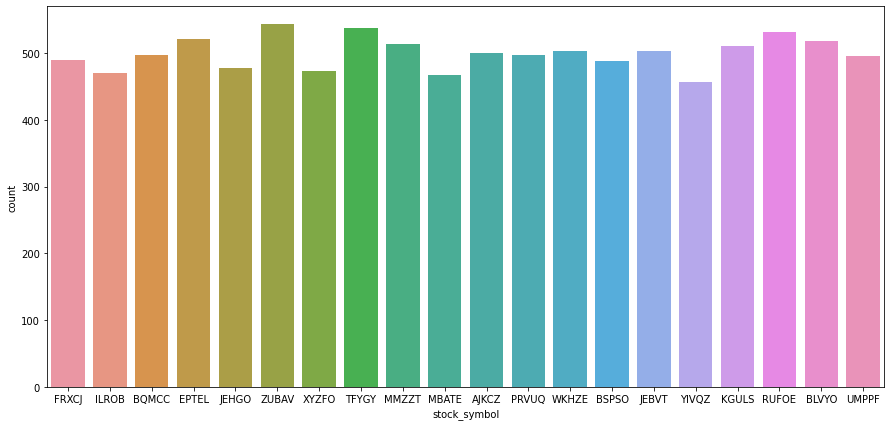

In [14]:
pl.figure(figsize=(15,7))
sns.countplot(x=df['stock_symbol'])
pl.show()

In [15]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,179632,FRXCJ,17,9,739,1177,2010-01-01,869803
1,1,852266,ILROB,11,19,921,2693,2010-01-02,2480253
2,2,576483,BQMCC,8,11,78,1523,2010-01-03,118794
3,3,964959,EPTEL,3,19,290,9874,2010-01-04,2863460
4,4,506457,JEHGO,15,3,718,8472,2010-01-05,6082896


In [16]:
df.shape

(10000, 9)

In [17]:
df_buyer_= df[df['buyer_broker']>df['seller_broker']]
df_buyer_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,179632,FRXCJ,17,9,739,1177,2010-01-01,869803
4,4,506457,JEHGO,15,3,718,8472,2010-01-05,6082896
8,8,649233,ZUBAV,4,3,980,8512,2010-01-09,8341760
9,9,641823,TFYGY,9,6,351,6943,2010-01-10,2436993
11,11,122373,MBATE,19,11,589,269,2010-01-12,158441


# Top turnover

In [18]:
df_buyer_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
ZUBAV    722351181
KGULS    679759751
BLVYO    674622569
EPTEL    653498128
AJKCZ    651512235
UMPPF    650400893
MMZZT    649690234
TFYGY    645005308
FRXCJ    644162179
RUFOE    643319157
BSPSO    643282422
BQMCC    638493073
PRVUQ    634440965
JEHGO    626390562
XYZFO    611440684
YIVQZ    576948011
WKHZE    561119373
ILROB    557235276
JEBVT    528321632
MBATE    527283853
Name: amount, dtype: int32

In [19]:
df_seller_= df[df['seller_broker']>df['buyer_broker']]
df_seller_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
1,1,852266,ILROB,11,19,921,2693,2010-01-02,2480253
2,2,576483,BQMCC,8,11,78,1523,2010-01-03,118794
3,3,964959,EPTEL,3,19,290,9874,2010-01-04,2863460
5,5,349989,ZUBAV,11,15,663,3973,2010-01-06,2634099
6,6,202684,JEHGO,2,4,471,5212,2010-01-07,2454852


In [20]:
df_seller_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
TFYGY    764648114
RUFOE    761060111
WKHZE    687223060
PRVUQ    678477980
JEBVT    668697527
ZUBAV    668303811
AJKCZ    664817639
MMZZT    648505194
KGULS    645049624
BLVYO    643151836
EPTEL    637412153
BQMCC    617121459
UMPPF    614432168
FRXCJ    612313556
XYZFO    602309904
JEHGO    596828281
BSPSO    586779039
ILROB    579735998
MBATE    575144471
YIVQZ    569941121
Name: amount, dtype: int32

In [21]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,179632,FRXCJ,17,9,739,1177,2010-01-01,869803
1,1,852266,ILROB,11,19,921,2693,2010-01-02,2480253
2,2,576483,BQMCC,8,11,78,1523,2010-01-03,118794
3,3,964959,EPTEL,3,19,290,9874,2010-01-04,2863460
4,4,506457,JEHGO,15,3,718,8472,2010-01-05,6082896


# Top buyer broker

In [22]:
df.groupby('buyer_broker')['quantity'].sum().sort_values(ascending=False)

buyer_broker
5     301356
13    297916
18    290775
7     285886
19    282210
16    282126
8     280232
14    277917
12    276806
2     275868
10    275764
6     275400
1     272653
4     271928
17    271590
11    270802
3     267029
9     263387
15    262606
Name: quantity, dtype: int32

# topseller broker

In [23]:
df.groupby('seller_broker')['quantity'].sum().sort_values(ascending=False)

seller_broker
19    301551
6     291298
17    286832
10    285639
14    284980
15    283849
7     281326
3     280749
9     280571
18    279598
1     279447
16    276937
4     275370
11    275068
5     272315
12    265967
8     264271
13    261394
2     255089
Name: quantity, dtype: int32

In [24]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,179632,FRXCJ,17,9,739,1177,2010-01-01,869803
1,1,852266,ILROB,11,19,921,2693,2010-01-02,2480253
2,2,576483,BQMCC,8,11,78,1523,2010-01-03,118794
3,3,964959,EPTEL,3,19,290,9874,2010-01-04,2863460
4,4,506457,JEHGO,15,3,718,8472,2010-01-05,6082896


In [37]:
grouped = df.groupby(['stock_symbol','buyer_broker'])['quantity'].sum().reset_index()
grouped

,stock_symbol,buyer_broker,quantity
0,AJKCZ,1,13341
1,AJKCZ,2,11305
2,AJKCZ,3,17195
3,AJKCZ,4,15180
4,AJKCZ,5,17913
...,...,...,...
375,ZUBAV,15,20198
376,ZUBAV,16,13840
377,ZUBAV,17,11843
378,ZUBAV,18,13991


In [40]:
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

## Top bought companies - High buying quantity of company stock (Single company)


In [43]:
temp_df[['stock_symbol','quantity']]

,stock_symbol,quantity
0,PRVUQ,21713
1,BSPSO,21592
2,UMPPF,21079
3,MMZZT,20660
4,JEBVT,20249
5,ZUBAV,20198
6,WKHZE,19862
7,TFYGY,19678
8,BQMCC,19673
9,AJKCZ,19332


## Top bought companies - High selling quantity of company stock (Single company)

In [28]:
grouped = df.groupby(['stock_symbol','seller_broker',])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

In [45]:
temp_df[['stock_symbol','quantity']]

,stock_symbol,quantity
0,PRVUQ,21713
1,BSPSO,21592
2,UMPPF,21079
3,MMZZT,20660
4,JEBVT,20249
5,ZUBAV,20198
6,WKHZE,19862
7,TFYGY,19678
8,BQMCC,19673
9,AJKCZ,19332


In [30]:
pivot = pd.pivot_table(data = df,
              columns="stock_symbol",
               index = "buyer_broker",
               values = "quantity",
               aggfunc= "sum"
              )


In [31]:
grouped = df.groupby(['seller_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['seller_broker']):
    temp=pd.DataFrame(grouped[grouped['seller_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

# Top broker top sell

In [32]:
temp_df

,seller_broker,stock_symbol,quantity
0,10,AJKCZ,22736
1,16,ZUBAV,21035
2,8,TFYGY,20587
3,19,JEBVT,20455
4,6,JEHGO,20322
5,18,RUFOE,19763
6,3,ZUBAV,19573
7,12,TFYGY,19520
8,14,MMZZT,19358
9,7,XYZFO,19281


In [33]:
grouped = df.groupby(['buyer_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['buyer_broker']):
    temp=pd.DataFrame(grouped[grouped['buyer_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)


# TOP broker top buy

In [46]:
temp_df

,stock_symbol,buyer_broker,quantity
0,PRVUQ,18,21713
1,BSPSO,5,21592
2,UMPPF,13,21079
3,MMZZT,13,20660
4,JEBVT,5,20249
5,ZUBAV,15,20198
6,WKHZE,5,19862
7,TFYGY,4,19678
8,BQMCC,19,19673
9,AJKCZ,18,19332
